<a href="https://colab.research.google.com/github/Sachithananthan-1/Sentimental-Analysis-using-Social-media-data/blob/main/Sentimental_Analysis_using_Social_media_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install nltk


In [3]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# https://medium.com/nerd-for-tech/easy-downloading-kaggle-data-to-google-drive-1be0a8835baa  -  Downloading Kaggle Data To Google Drive
import os

os.environ['KAGGLE_USERNAME'] = "sachikrish"

# username from the json file

os.environ['KAGGLE_KEY'] = " " #Add your kaggle json password

# key from the json file



In [3]:
!kaggle datasets download -d kazanova/sentiment140

 94% 76.0M/80.9M [00:01<00:00, 84.0MB/s]
100% 80.9M/80.9M [00:01<00:00, 77.1MB/s]


In [4]:
!unzip -q "/content/sentiment140.zip"

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


In [8]:
# Download NLTK resources (run only once)
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [56]:
df = pd.read_csv("/content/training.1600000.processed.noemoticon.csv", encoding='latin1',header=None)
df.reset_index(inplace=True)

In [41]:
df.shape

(1600000, 7)

In [49]:
df.head()

,index,0,1,2,3,4,5
0,0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [43]:
df.isnull().sum()

index    0
0        0
1        0
2        0
3        0
4        0
5        0
dtype: int64

In [50]:
df[0].value_counts()


0    800000
4    800000
Name: 0, dtype: int64

In [57]:
df[0] = df[0].map({0: 0, 4: 1})

# 0 = negative, 1 = positive
df.rename(columns={0: 'label'}, inplace=True)

In [58]:
df.rename(columns={2: 'timestamp'}, inplace=True)

In [53]:
df.head()

,index,label,1,timestamp,3,4,5
0,0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [15]:
def preprocess_text(text):

  #Convert to lower case
  text = text.lower()

  # Remove stop words
  stop_words = stopwords.words('english')
  word_tokens = word_tokenize(text)
  text =' '.join([word for word in word_tokens if word.isalpha() and word not in stop_words])
  return text

df['processed_text'] = df[5].apply(preprocess_text)


In [16]:
X = df['processed_text']
Y = df['label']

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=12)

In [18]:
vectorizer = TfidfVectorizer(max_features=5000)
train_features = vectorizer.fit_transform(X_train)
test_features = vectorizer.transform(X_test)


In [19]:
# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(train_features, Y_train)


MultinomialNB()

In [20]:
# Predict on the test set
predictions = classifier.predict(test_features)

# Evaluate the model
accuracy = accuracy_score(Y_test, predictions)
print(f'Accuracy: {accuracy}')
print('\nClassification Report:')
print(classification_report(Y_test, predictions))

Accuracy: 0.75759375

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.75      0.76    160427
           1       0.75      0.77      0.76    159573

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



In [21]:
# Cross validation

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(classifier, train_features, Y_train, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Accuracy: {cv_scores.mean()}')


Cross-Validation Scores: [0.75759375 0.75873437 0.75886328 0.75757422 0.75912109]
Mean Accuracy: 0.75837734375


In [22]:
# Calculate accuracy, precision, recall, and F1-score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy = accuracy_score(Y_test, predictions)
print(f'Accuracy: {accuracy}')

precision = precision_score(Y_test,predictions, average='weighted')
recall = recall_score(Y_test, predictions, average ='weighted')
f1 = f1_score(Y_test, predictions, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')


class_report = classification_report(Y_test, predictions)
print('Classification Report:\n', class_report)

Accuracy: 0.75759375
Precision: 0.7577303217322667
Recall: 0.7575937500000001
F1-score: 0.7575719996860868
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.76    160427
           1       0.75      0.77      0.76    159573

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



In [26]:
# Word Clouds

!pip install wordcloud matplotlib nltk


In [27]:
text_data = df['processed_text'].values

text = ' '.join(text_data)

In [28]:
wordcloud = WordCloud(width=800, height=400, background_color='white', random_state=21, max_words=200, stopwords=STOPWORDS).generate(text)


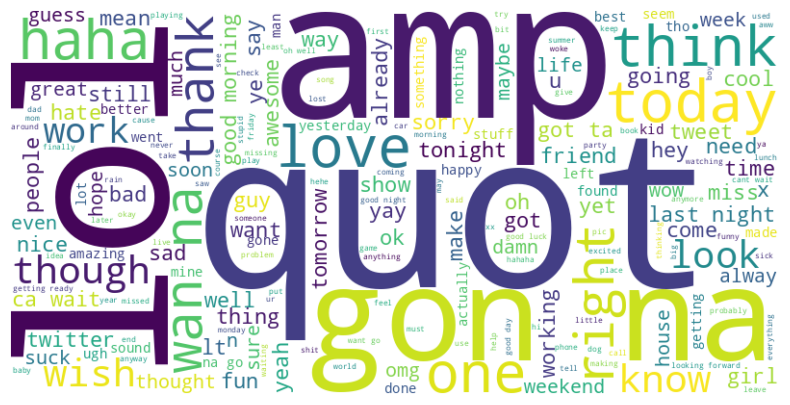

In [29]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

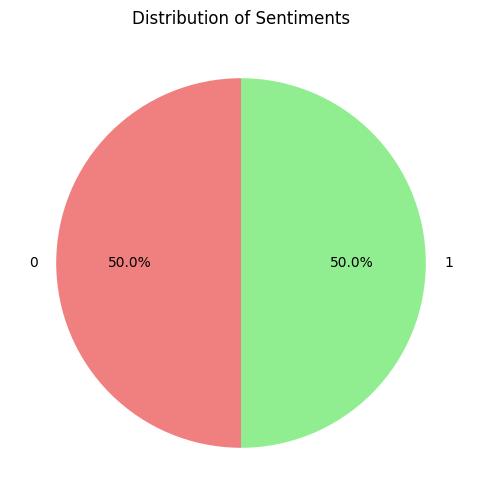

In [30]:
# Distribution of Sentiments

sentiment_counts = df['label'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Distribution of Sentiments')
plt.show()


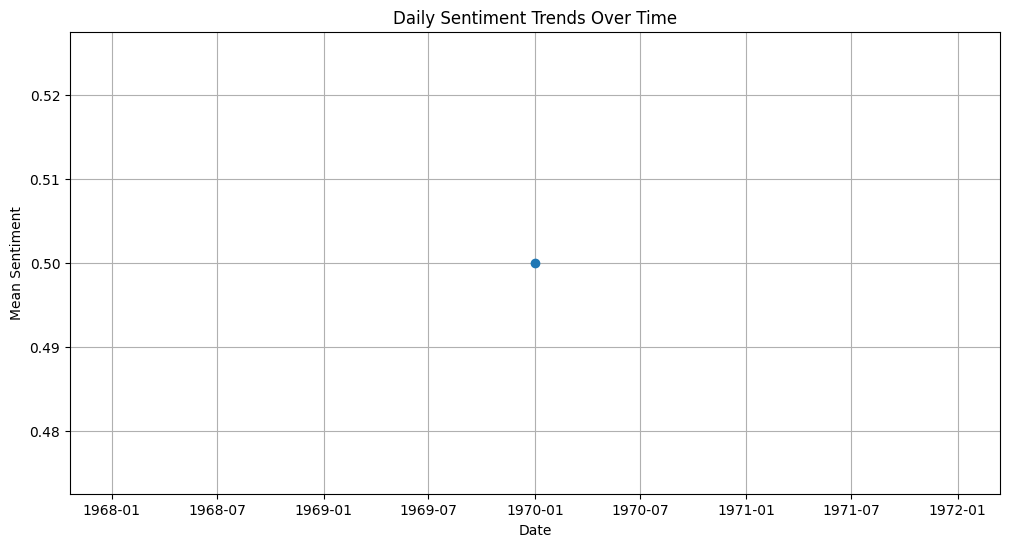

In [14]:
df[1] = pd.to_datetime(df[1], errors='coerce', infer_datetime_format=True)

df[1] = pd.to_datetime(df[1], errors='coerce', infer_datetime_format=True)

# Set timestamp as the index for time series analysis
df.set_index(1, inplace=True)

# Resample data to daily frequency and calculate the mean sentiment for each day
daily_sentiment = df['label'].resample('D').mean()
# Plotting time series data
plt.figure(figsize=(12, 6))
plt.plot(daily_sentiment.index, daily_sentiment, marker='o', linestyle='-')
plt.title('Daily Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Sentiment')
plt.grid(True)
plt.show()

In [15]:
daily_sentiment.index

DatetimeIndex(['1970-01-01'], dtype='datetime64[ns]', name=1, freq='D')

In [17]:
print(df[1])



KeyError: ignored

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has a timestamp column ('timestamp') and a sentiment label column ('label')
# You can adjust the column names based on your data

# Convert the Unix timestamps to DatetimeIndex
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s', errors='coerce').fillna(pd.to_datetime('today'))

# Set timestamp as the index for time series analysis
df.set_index('timestamp', inplace=True)

# Resample data to daily frequency and calculate the mean sentiment for each day
daily_sentiment = df['label'].resample('D').mean()

# Plotting time series data
plt.figure(figsize=(12, 6))
plt.plot(daily_sentiment.index, daily_sentiment, marker='o', linestyle='-')
plt.title('Daily Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Sentiment')
plt.grid(True)
plt.show()


KeyError: ignored

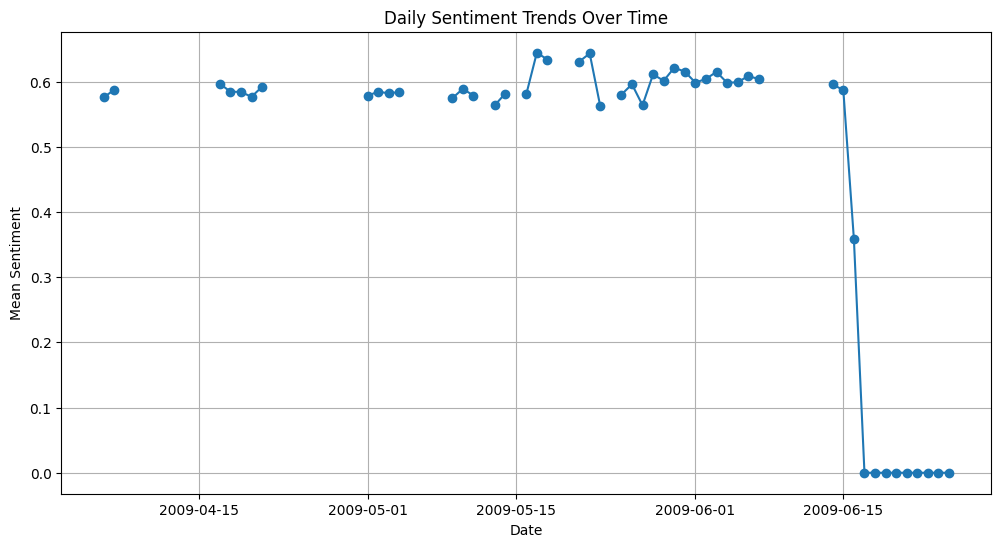

In [59]:
# Convert the string timestamp to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'].str.replace('PDT', '-0700'), format='%a %b %d %H:%M:%S %z %Y', errors='coerce')

# Set timestamp as the index for time series analysis
df.set_index('timestamp', inplace=True)

# Resample data to daily frequency and calculate the mean sentiment for each day
daily_sentiment = df['label'].resample('D').mean()

# Plotting time series data
plt.figure(figsize=(12, 6))
plt.plot(daily_sentiment.index, daily_sentiment, marker='o', linestyle='-')
plt.title('Daily Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Sentiment')
plt.grid(True)
plt.show()

In [60]:
df.head()

,index,label,1,3,4,5
timestamp,,,,,,
2009-04-06 22:19:45-07:00,0,0,1467810369,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
2009-04-06 22:19:49-07:00,1,0,1467810672,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2009-04-06 22:19:53-07:00,2,0,1467810917,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2009-04-06 22:19:57-07:00,3,0,1467811184,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
2009-04-06 22:19:57-07:00,4,0,1467811193,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
